Nama Lengkap: DImas Ilham
username: dimasilham7
No. Telepon: +6281314716859
Kota: Serang
Tempat, Tanggal lahir: Kota Jakarta Timur
Pendidikan Terakhir: SMA
Perusahaan/institusi saat ini: Universitas Diponegoro
Pekerjaan/profesi saat ini: Pelajar/Mahasiswa

##Connect ke drive

In [1]:
import os

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
drive_link = '/content/drive/My Drive/'
my_link = drive_link+'Latihan/'

In [3]:
DATA_DIR = my_link+'rock paper scissor/'

# load repo with data if it is not exists
if not os.path.exists(DATA_DIR):
  print('Dataset not exist...')
else:
  print('Dataset Exist...')

Dataset Exist...


##install requirement

In [4]:
!pip install q tensorflow
!pip install q keras

In [5]:
## Imports libs

import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

##cek isi folder

In [6]:
base_dir = '/content/drive/My Drive/Latihan/rock paper scissor/rockpaperscissors'
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

os.listdir(base_dir)

['README_rpc-cv-images.txt',
 'paper',
 'scissors',
 'rock',
 'rps-cv-images',
 'train',
 'val']

In [7]:
os.listdir('/content/drive/My Drive/Latihan/rock paper scissor/rockpaperscissors/rock')

['AiAPUXqX24FjC0mU.png',
 'HHXLX66BbEVNYl6W.png',
 '84UHPxArtBOr8GF2.png',
 'ELmZ4ELVncvjq7J6.png',
 'BnnRzew7yA30gyts.png',
 'BTcHjuerLAYWzx8S.png',
 '8xToYACSoKU0swum.png',
 '5nKDkVzIMQWmtReM.png',
 'GksMLm2b4t6sUYzY.png',
 '86KzO2PHymh6qYQ4.png',
 '8EjcPHxZBpTtX8bM.png',
 '1UucZqS3qblvU0cH.png',
 '8HKeT2oFz3gPSW0p.png',
 '6bGxG6c9DxmZBcIB.png',
 'CpWDLKaUbf6poyIj.png',
 '7xXAch1NxPhoEdk4.png',
 'CKLOvn69epi2Qcxg.png',
 '51TTZXCnAuk3Ck6s.png',
 '6ZWuYAkiYnDTDa2N.png',
 'GQjExZ14HfbKjnEp.png',
 'DEX2gmMwS3fxdi23.png',
 'BFVK8zqyFZ9SFqm4.png',
 '545XFudcV0UlnH2Y.png',
 '7NqXwATGidLt6kZY.png',
 'Bm9hYmhGUGmKxDwK.png',
 'F2MYeViv785ejIrb.png',
 '2affjOmZChc9AXpR.png',
 'H5UvLsMVpHQH2q0i.png',
 '7wFK6yhjKaNkhwZs.png',
 '2DdERUV7Te8ivywq.png',
 'IR0TvCNLcK7IrE1a.png',
 'FPa2M1e589cxIyfR.png',
 '43pApTDJOff5Fy62.png',
 '5G0hCO6RJXNyxcgV.png',
 'BYG1hwCG8M64UXIV.png',
 '96Sw16ZnG0zF8Qo0.png',
 'C5KTDubAmdwtcK6u.png',
 'I8DyB4yRN0Q8voWp.png',
 'HxzCqTAGvmLYaHjA.png',
 'FFAcRoW2ejkNNheZ.png',


In [8]:
os.listdir('/content/drive/My Drive/Latihan/rock paper scissor/rockpaperscissors/paper')

['0eqArS2GgsBeqgSn.png',
 '0Og76sl5CJhbxWWx.png',
 '04l5I8TqdzF9WDMJ.png',
 '0cb6cVL8pkfi4wF6.png',
 '0Uomd0HvOB33m47I.png',
 '0a3UtNzl5Ll3sq8K.png',
 '0RA9rcrv8iVvuDDU.png',
 '0t08v9bAaA0mXGCQ.png',
 '1fKclJk4eBWOQSR1.png',
 '1Dfw5FRlS4h60JPX.png',
 '1oKnUgV2CdCaQUUX.png',
 '14K62H4KG1hg5qiJ.png',
 '2OCAZGNv2OEzgAwU.png',
 '1yeoLbmp4alVOtFv.png',
 '27XFtQjjXQ8AP8Tl.png',
 '1Tt9U9SzrOm98Xtw.png',
 '2DQbLQfHlfrcATqi.png',
 '2UKnsncgPodQLOFR.png',
 '2SldJqjiZwIVPef9.png',
 '2F8Ng7620ANA7tEK.png',
 '1yKjzquSvl9ShK7K.png',
 '1uoW7QcH2qAgCTxv.png',
 '2IOsxsG8AaxntdJM.png',
 '1jHtb93pI8f6pfKo.png',
 '0zKU6wEhT2cDe9j0.png',
 '0vugygEjxQJPr9yz.png',
 '1Frbe8cdOdkciOBg.png',
 '2PAcPusQ59xIMfiw.png',
 '2PiUTczN5Ez4VreF.png',
 '4hcthlc3eCByBJFh.png',
 '5Iz9WPYz1C3PKWxj.png',
 '3K6a8bG8j1YTH1l0.png',
 '3MMu7EXUtM6aEtXU.png',
 '5U8st2LCr9zLl5og.png',
 '68QZtdP6UaIcIE55.png',
 '6NzgMmSELzk3WtZh.png',
 '2tDgPZGqbrw95j39.png',
 '6q2PxM8Kk16UxoMY.png',
 '5kJec3v9txvrAb4g.png',
 '73UfZ8Dwj0OB66IV.png',


In [9]:
os.listdir('/content/drive/My Drive/Latihan/rock paper scissor/rockpaperscissors/scissors')

['6i1Xy1NAW6h8RzL7.png',
 'CTbANISUvZMD2T4L.png',
 '8VaAxK3h5GeQAqRn.png',
 '1WX9KKoq0nkWiTxI.png',
 'G5iYVibCVfZW27jB.png',
 'EBh8bZgOANio5kQw.png',
 'EiSbUEkcpA3vRMGd.png',
 'CPRUyuzmPTO8JrEp.png',
 '8Q1PAZsxpLf5FAo6.png',
 '5QHP8zydBsbWyt4T.png',
 '9ZqjWey4XHP94iRr.png',
 '4hvoLYY28SGuZCEI.png',
 '2EeIeEe1P0a0Fi9v.png',
 'FeKk3jfdVyzHV7l5.png',
 '7dBQ0fOpCs03OmnR.png',
 '6drquJLYR4bjZX2E.png',
 '1yDUM1w2HTbuPIfO.png',
 '1CXgK9fgGdSRggD9.png',
 '8dKMDDHzX9WeRAaN.png',
 '8AR7dUmrz9jcFrHu.png',
 '7M6QmAbgSaXFX9ES.png',
 '9C2CyZRK18hcyHSx.png',
 '3Q6h5cXYeNTeOLgD.png',
 '6CyIuv1pvHDwTWmR.png',
 '8isFA2VQqLOxzuvC.png',
 '9VLUR3WfMvIdEMrO.png',
 'BdMHRwUTJ4FI4uPr.png',
 '3dI7E5pwR07mvKvF.png',
 'GGQjHIWNHMjBHBsr.png',
 'FCsZ8xbkykokN7sp.png',
 'FP1L4Ax4XDmqP2QB.png',
 'BtUfOjTzw9EEvNHO.png',
 '2V5E7uHmAh9eK0qt.png',
 'Gr3EpS7AO3KtWTz0.png',
 '55yz6JI9f5DTbq9D.png',
 '63khvkT3L0GCdMHh.png',
 '7gnNbHRprrV3r7kX.png',
 '7Zb3QM9tznboKuQE.png',
 'Cw34q0DptQFOEeoF.png',
 'FSJKz70kgKxJyjjl.png',


##split dataset

In [10]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(val_dir, 'rock')
val_paper = os.path.join(val_dir, 'paper')
val_scissors = os.path.join(val_dir, 'scissors')

In [11]:
from sklearn.model_selection import train_test_split

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size=0.4)

In [12]:
import shutil

for rock in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, rock), os.path.join(train_rock, rock))
for paper in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, paper), os.path.join(train_paper, paper))
for scissors in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, scissors), os.path.join(train_scissors, scissors))

In [13]:
for rock in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, rock), os.path.join(val_rock, rock))
for paper in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, paper), os.path.join(val_paper, paper))
for scissors in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, scissors), os.path.join(val_scissors, scissors))

In [14]:
rock = len(os.listdir(rock_dir))
paper = len(os.listdir(paper_dir))
scissors = len(os.listdir(scissors_dir))
total_data = rock + paper + scissors
print("Total data = ", total_data)


# Memastikan Jumlah Dataset
rock_train_count = len(os.listdir(train_rock))
paper_train_count = len(os.listdir(train_paper))
scissors_train_count = len(os.listdir(train_scissors))
train_total = rock_train_count + paper_train_count + scissors_train_count
print("Total Data Trainig = ", train_total)

rock_val_count = len(os.listdir(val_rock))
paper_val_count = len(os.listdir(val_paper))
scissors_val_count = len(os.listdir(val_scissors))
val_total = rock_val_count + paper_val_count + scissors_val_count
print("Total Data Validation = ", val_total)

Total data =  2188
Total Data Trainig =  1312
Total Data Validation =  876


##Image augmentation

In [15]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size =(150,150),# mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,# direktori data validasi
    target_size = (150,150),# mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size = 32,
    class_mode = 'categorical'
)



Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [21]:
pip uninstall keras-preprocessing

Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Keras_Preprocessing-1.1.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/keras_preprocessing/*
Proceed (y/n)? y
  Successfully uninstalled Keras-Preprocessing-1.1.2


In [23]:
pip install git+https://github.com/keras-team/keras-preprocessing.git

  Cloning https://github.com/keras-team/keras-preprocessing.git to /tmp/pip-req-build-pw6_j29v
  Running command git clone -q https://github.com/keras-team/keras-preprocessing.git /tmp/pip-req-build-pw6_j29v
  Created wheel for Keras-Preprocessing: filename=Keras_Preprocessing-1.1.2-py3-none-any.whl size=43632 sha256=9a6bf37ad5bcdae820518b1a49e31549d5b70a2b804dd4a46731e4017bbea7cf
  Stored in directory: /tmp/pip-ephem-wheel-cache-3akq14if/wheels/6d/8c/1d/f7c16ffd97b199cf4a20b04f1b9444a9390272edafb52c45f7
Successfully built Keras-Preprocessing


##membuat model

In [26]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same',),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same',),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', padding='same',),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [27]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.RMSprop(), # optimizer RMSprop
              metrics=['AUC', 'accuracy', 'Precision']) 

In [28]:
# summarize model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 256)       2

In [29]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 41s - loss: 1.7037 - auc: 0.5563 - accuracy: 0.4062 - precision: 0.3993 - val_loss: 1.0974 - val_auc: 0.5107 - val_accuracy: 0.3250 - val_precision: 0.0000e+00
Epoch 2/20
25/25 - 9s - loss: 0.8319 - auc: 0.8144 - accuracy: 0.6450 - precision: 0.6902 - val_loss: 1.0832 - val_auc: 0.6568 - val_accuracy: 0.3562 - val_precision: 0.0000e+00
Epoch 3/20
25/25 - 9s - loss: 0.5411 - auc: 0.9284 - accuracy: 0.8188 - precision: 0.8492 - val_loss: 0.9873 - val_auc: 0.8551 - val_accuracy: 0.7125 - val_precision: 1.0000
Epoch 4/20
25/25 - 9s - loss: 0.3656 - auc: 0.9639 - accuracy: 0.8662 - precision: 0.8818 - val_loss: 0.9591 - val_auc: 0.8200 - val_accuracy: 0.6250 - val_precision: 1.0000
Epoch 5/20
25/25 - 9s - loss: 0.3113 - auc: 0.9732 - accuracy: 0.8925 - precision: 0.9037 - val_loss: 0.9161 - val_auc: 0.8418 - val_accuracy: 0.7063 - val_precision: 0.9583
Epoch 6/20
25/25 - 9s - loss: 0.3733 - auc: 0.9673 - accuracy: 0.8963 - precision: 0.9069 - val_loss: 0.8737 - val_auc: 0

dict_keys(['loss', 'auc', 'accuracy', 'precision', 'val_loss', 'val_auc', 'val_accuracy', 'val_precision'])


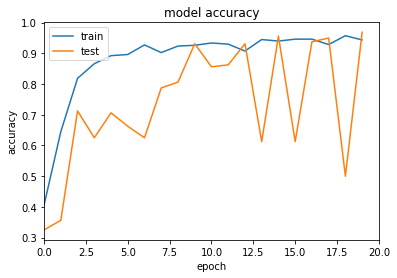

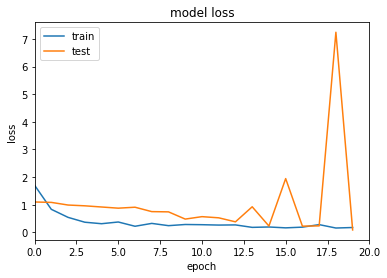

In [30]:
#visualisasi loss dan accuracy model
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.gcf()
axes = plt.gca()
axes.set_xlim([0,20])
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.gcf()
axes = plt.gca()
axes.set_xlim([0,20])
plt.show()

dict_keys(['loss', 'auc', 'accuracy', 'precision', 'val_loss', 'val_auc', 'val_accuracy', 'val_precision'])


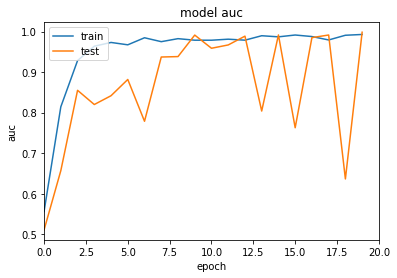

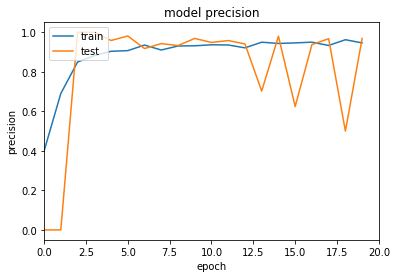

In [32]:
#visualisasi loss dan accuracy model
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.gcf()
axes = plt.gca()
axes.set_xlim([0,20])
plt.show()
# summarize history for loss
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.gcf()
axes = plt.gca()
axes.set_xlim([0,20])
plt.show()

Saving Rock-paper-scissors_(paper).png to Rock-paper-scissors_(paper).png
Rock-paper-scissors_(paper).png
paper


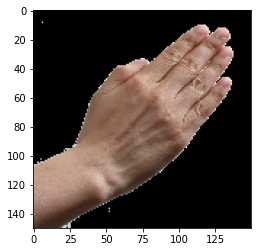

In [35]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')

## kesimpulan

jika gambar 50% pergelangan tangan model dapat salah membaca gambar menjadi paper, dianjurkan gambar yang ada menggunakan gambar tanpa pergelangan tangan